In [2]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [3]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_97950/1375469573.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [4]:
from scipy.optimize import curve_fit
from copy import copy, deepcopy
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

def int_to_pauli(i,n):
    p = np.base_repr(i,base=4)
    p = '0'*(n-len(p)) + p
    p = p.replace('0','I').replace('1', 'X').replace('2', 'Y').replace('3', 'Z')
    return p

def commute(p,q):
    c = 1
    n = len(p)
    for i in range(n):
        if p[i] != 'I' and q[i] != 'I':
            if p[i] != q[i]:
                c *= -1
    return c

def fidelity_to_error(pauli_fidelity,n):
    N = 4**n
    pauli_error = {}
    for i in range(N):
        p = int_to_pauli(i,n)
        pauli_error[p] = 0
        for j in range(N):
            q = int_to_pauli(j,n)
            pauli_error[p] += pauli_fidelity[q] * commute(p,q) / N
    return pauli_error
    

In [5]:
import random   
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



In [6]:
# filename = str(uuid.uuid4())
# filename+="XX23541_noSE_explicitCNOT_XX_R_0711_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0223_45213/eab_results_file/5227f180-81c1-473a-b257-d10e5148c89aXX45213_FTXX_02232024_01+10_ExperimentalData", "rb") as fp:
    eab_load_cpy=pickle.load(fp)

In [8]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
shots=2000
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

# print (eab_result)


Data analysis: no bootstrapping, different depth

Analyze full set of data without bootstrapping

Parameters: n = 2, C = 20,  L =  [2, 4, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.03801397155798769
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0379358 0.0036624
YI 0.0442119 0.0035313
ZI 0.0383806 0.0032341
IX 0.0242277 0.0019575
XX 0.0545731 0.0045081
YX 0.0476746 0.0034167
ZX 0.0433429 0.0036791
IY 0.039068 0.0035489
XY 0.0470645 0.0033918
YY 0.0597778 0.004503
ZY 0.0357458 0.0025831
IZ 0.0336198 0.0028168
XZ 0.0422654 0.0036065
YZ 0.0449178 0.0037219
ZZ 0.015418 0.0009894


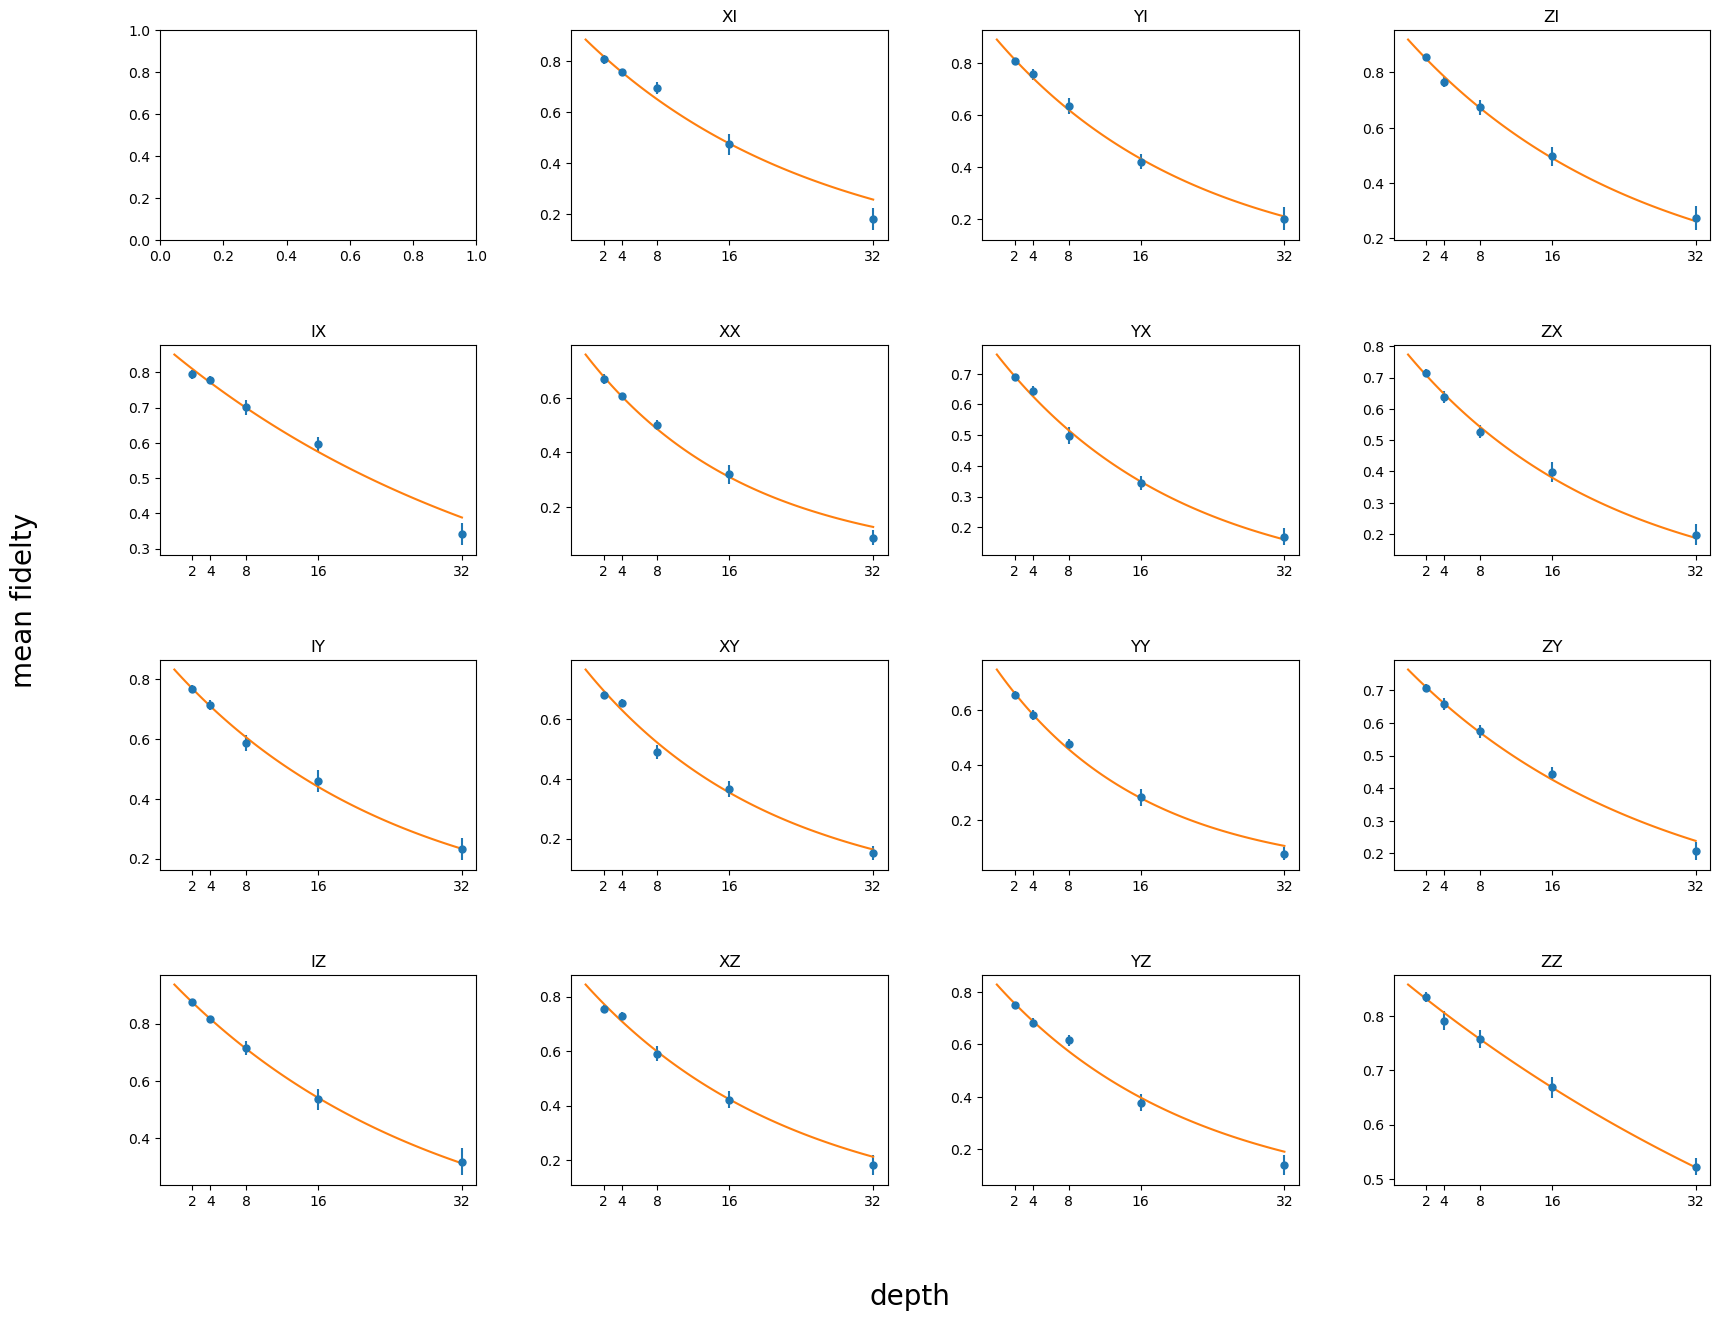

In [9]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

In [10]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.961986
XI 0.0031697
YI 0.0013268
ZI 0.0092886
IX 0.0017207
XX 0.0039395
YX 0.005938
ZX 0.0005169
IY 0.0002409
XY 0.0035863
YY 0.0006818
ZY 0.0001858
IZ 0.0059203
XZ 0.0004687
YZ 7.95e-05
ZZ 0.0009504


scatter plot: result from each circuit

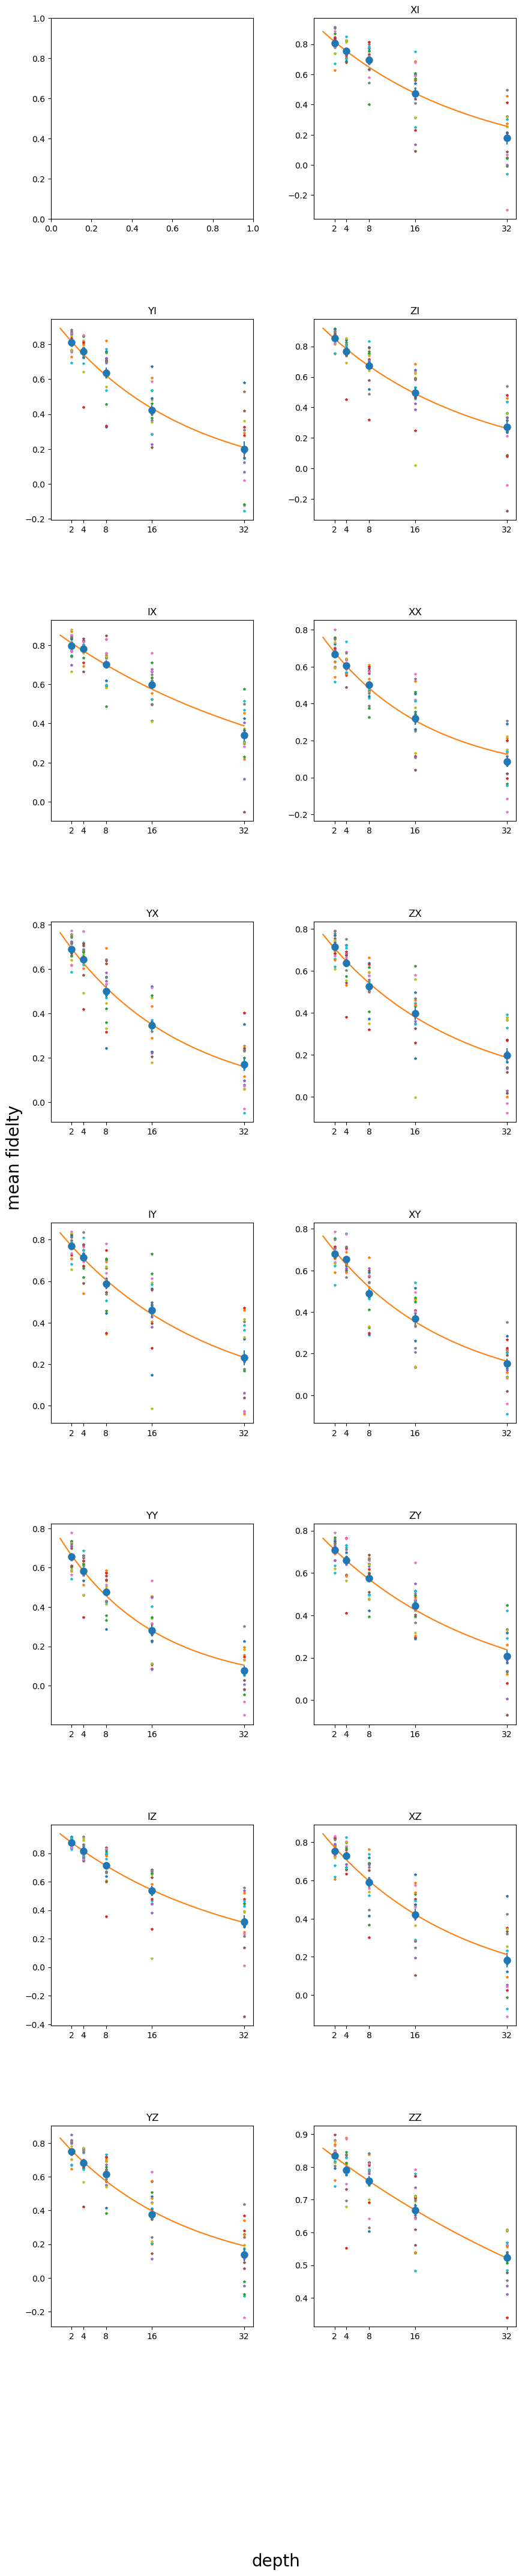

In [11]:
x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(8, 2)
fig.set_figwidth(10)
fig.set_figheight(50)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (8):
    for j in range(2):
        pauli_label=pauli_request_list[2*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
#             print ([tuple(eab_result['fidelity_list'][pauli_label][2])])
            axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=8)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

# data analysis with bootstrapping

full set of data with bootstrapping

In [12]:
import bootstrap

raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
alpha_detail={}
a_detail={}
alpha_error_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        fidelity_list[pauli_label] = alpha_bootstrap #avg pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err_bootstrap #error on pauli fidelity from fit
        a_BS_dic[pauli_label]=a_rtn_frm_fit #list of 10 pauli fidelities from fit 
        Y_BS_dic[pauli_label]=Y_rtn_frm_fit #list of error bars associated with 10 pauli fidelities from fit 
        Yerr_BS_dic[pauli_label]=Yerr_rtn_frm_fit 
        alpha_detail[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit


# pauli_label="IX"
# print (Y_BS_dic["IX"][0])    
# print (Yerr_BS_dic["IX"][0])  
# print (a_BS_dic["IX"][0])
# print (alpha_detail[pauli_label][0])


Method I: use the average of the 10 sets of Pauli fidelities from 10 times of resampling in bootstrapping. Everytime 15 circuits are sampled from 20.


Total error =  0.038117278557878276
II 0.0 0.0
XI 0.0374413 0.0015198
YI 0.0450679 0.0019602
ZI 0.0395131 0.0014637
IX 0.0244403 0.000789
XX 0.0553626 0.0020628
YX 0.0475573 0.0013841
ZX 0.0429825 0.0025243
IY 0.0377366 0.0023424
XY 0.0463298 0.001914
YY 0.059464 0.003042
ZY 0.0362563 0.0013153
IZ 0.0338359 0.0018528
XZ 0.0431062 0.0020388
YZ 0.0453442 0.0022649
ZZ 0.0154385 0.0007054


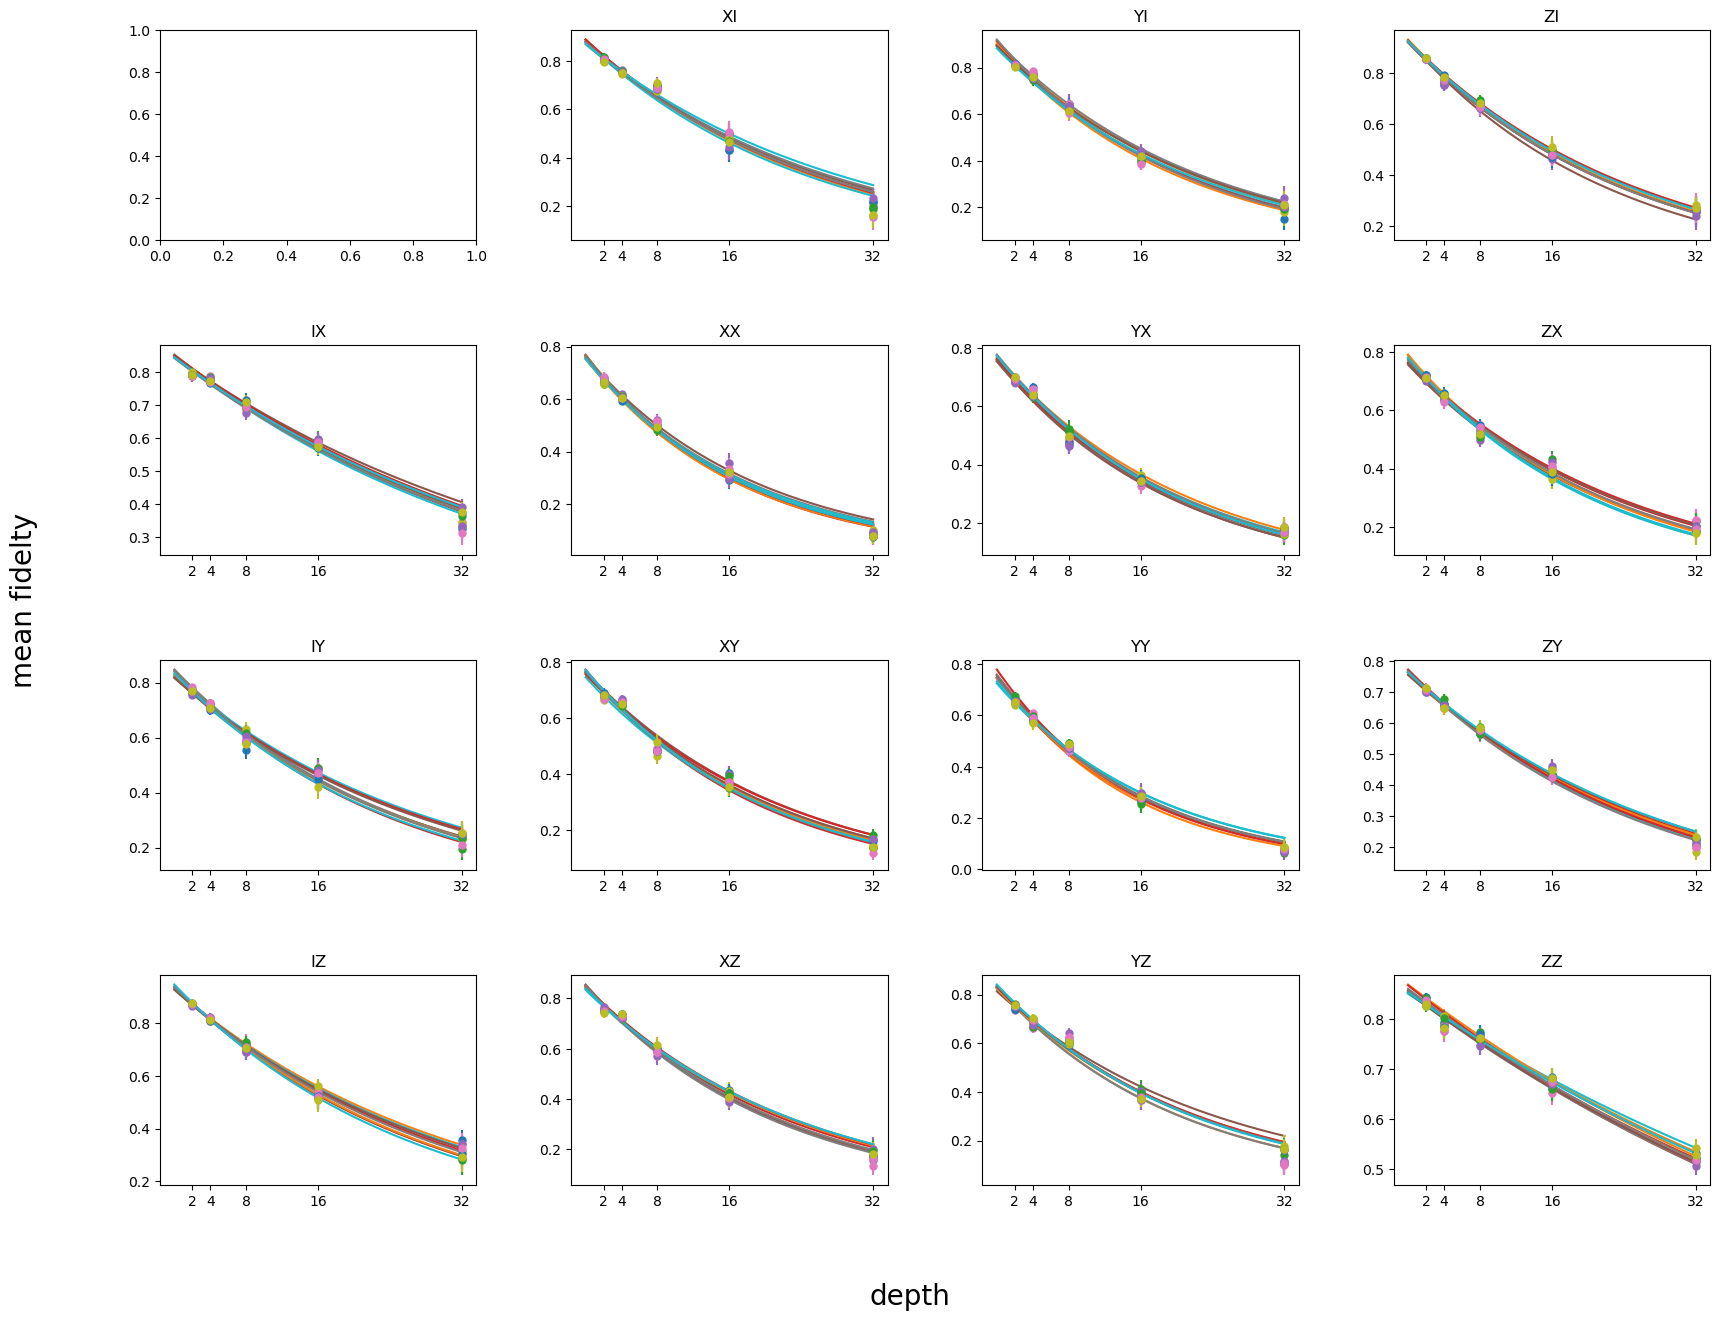

In [13]:
print("Total error = ", 1-np.mean(list(fidelity_list.values())))
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))
    else:
        print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))


x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
            for m in range (10):
                axs[i, j].errorbar(depth,Y_BS_dic[pauli_label][m], yerr=Yerr_BS_dic[pauli_label][m], fmt='o',markersize=5)
                axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_BS_dic[pauli_label][m], alpha_detail[pauli_label][m]))
            axs[i, j].set_title(pauli_label[::-1])

# print (alpha_detail)    

Method II: use the average of the 10 sets of Y from resampling as the a new set of Y and do the fit once with the new Y


Parameters: n = 2, C = 20,  L =  [2, 4, 8]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.03553872369396793
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0256448 0.0008659
YI 0.0399954 0.0010461
ZI 0.0398562 0.0007546
IX 0.0190954 0.0008455
XX 0.0469195 0.0013648
YX 0.0505058 0.001724
ZX 0.0499238 0.0014685
IY 0.0403634 0.0016455
XY 0.0500737 0.0013732
YY 0.052074 0.0012554
ZY 0.0341317 0.0008582
IZ 0.0338454 0.00081
XZ 0.0359843 0.0010345
YZ 0.034971 0.0012601
ZZ 0.0152351 0.0007329
{'IX': [0.8054599999999998, 0.7541133333333333, 0.6921466666666667], 'IY': [0.8117933333333331, 0.7642799999999998, 0.6290199999999999], 'IZ': [0.8553666666666666, 0.7677466666666667, 0.6744066666666668], 'XI': [0.7932066666666666, 0.7776466666666668, 0.69772], 'XX': [0.6685800000000001, 0.6074066666666667, 0.5010866666666668], 'XY': [0.6884533333333335, 0.6441866666666667, 0.48807999999999996], 'XZ': [0.7113866666666666, 0.6427133333333334, 0.5227866666666666]

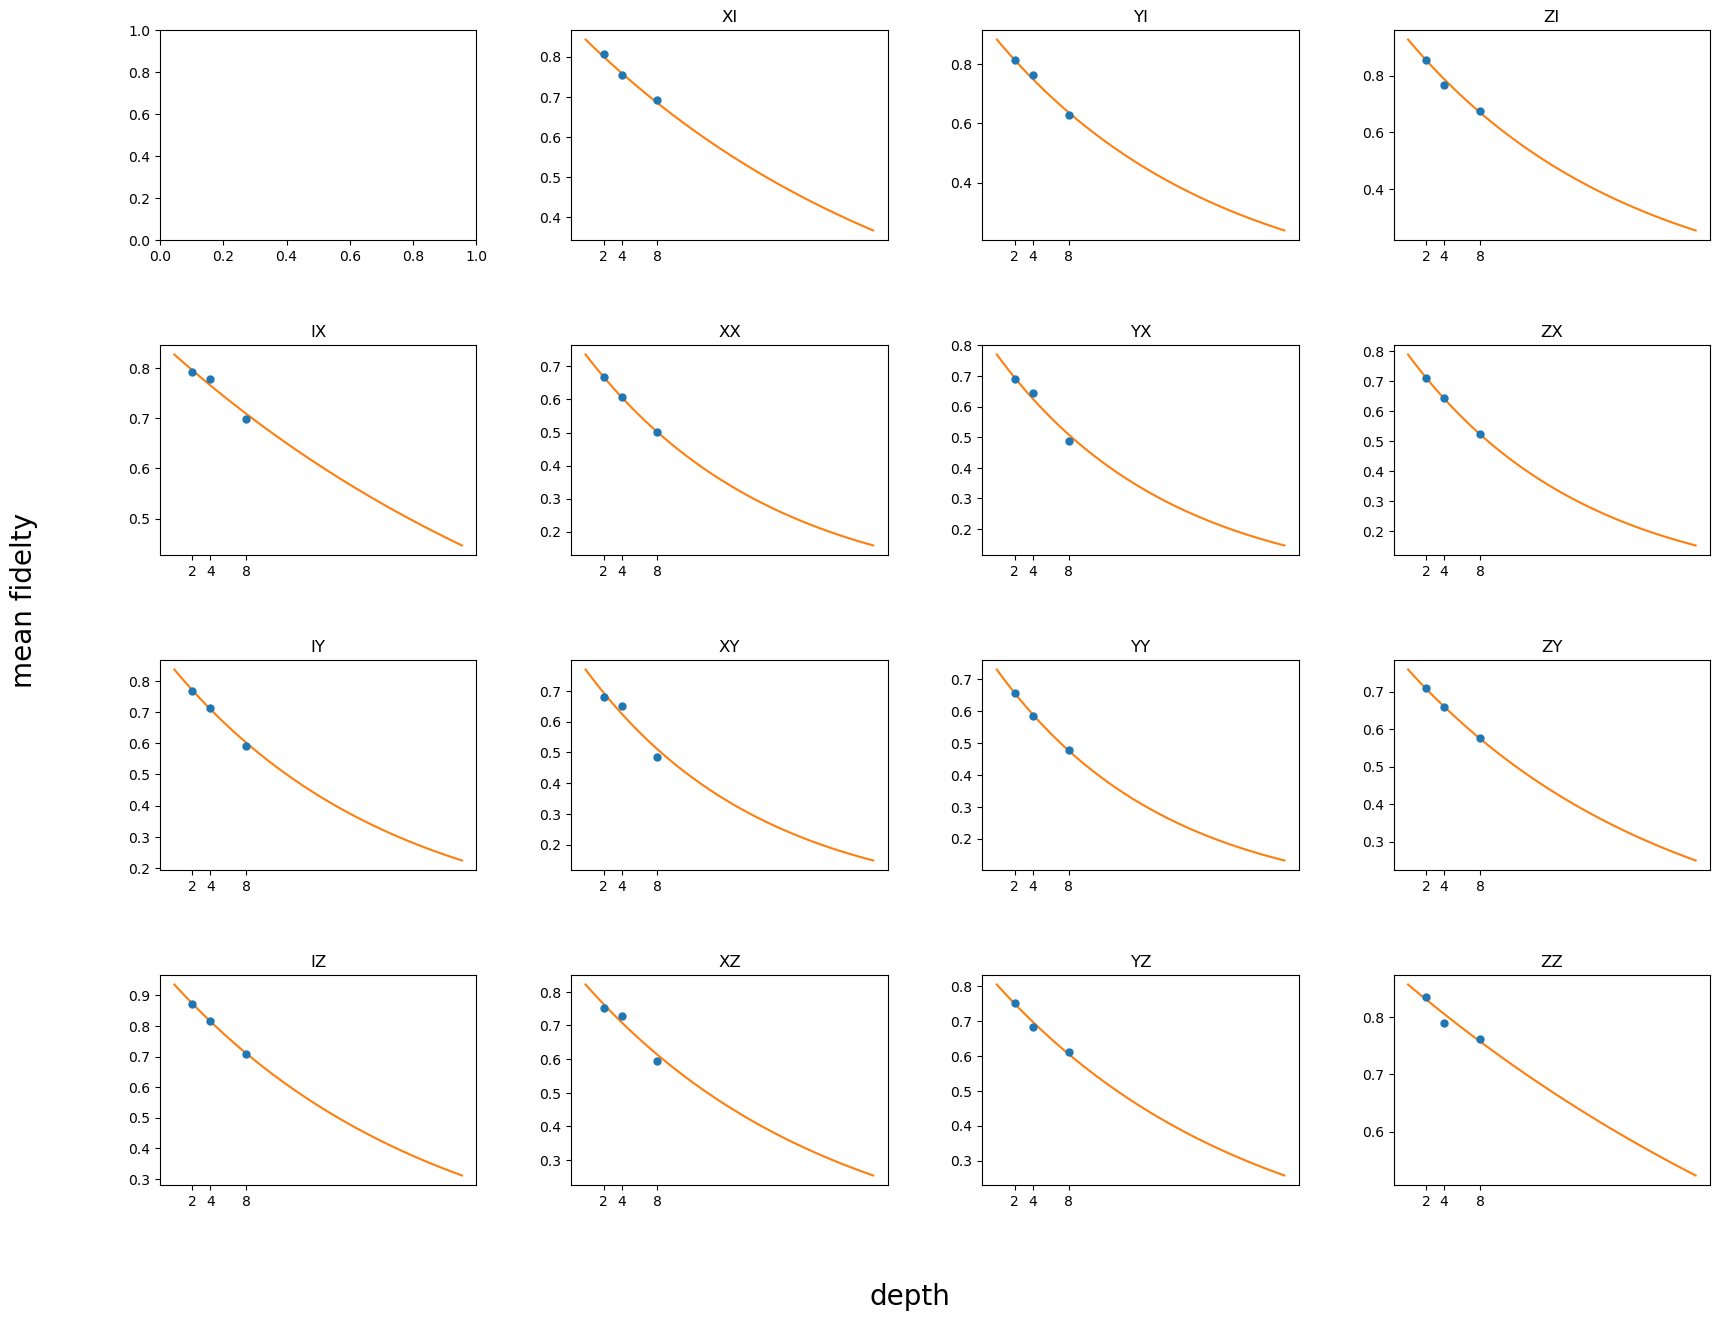

In [14]:
raw_fidelity_list_avg={}
for pauli_label in pauli_request_list:
    raw_fidelity_list_avg[pauli_label]={}
    raw_fidelity_list_avg[pauli_label][2]=[]
    raw_fidelity_list_avg[pauli_label][4]=[]
    raw_fidelity_list_avg[pauli_label][8]=[]
#     raw_fidelity_list_avg[pauli_label][16]=[]
#     raw_fidelity_list_avg[pauli_label][32]=[]
    if (pauli_label=="II"):
        raw_fidelity_list_avg[pauli_label][2]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][4]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][8]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][16]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][32]=[1.0]*10
    else:
        for i in range (10):
            raw_fidelity_list_avg[pauli_label][2].append(Y_BS_dic[pauli_label][i][0])
            raw_fidelity_list_avg[pauli_label][4].append(Y_BS_dic[pauli_label][i][1])
            raw_fidelity_list_avg[pauli_label][8].append(Y_BS_dic[pauli_label][i][2])
#             raw_fidelity_list_avg[pauli_label][16].append(Y_BS_dic[pauli_label][i][3])
#             raw_fidelity_list_avg[pauli_label][32].append(Y_BS_dic[pauli_label][i][4])


raw_fidelity_list = raw_fidelity_list_avg
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

In [13]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9643437
XI 0.0048228
YI 0.0007793
ZI 0.0051084
IX 0.000621
XX 0.0064752
YX 0.0051543
ZX 0.000597
IY 0.0006604
XY 0.0029923
YY 0.000279
ZY -0.0005972
IZ 0.0078357
XZ 0.0003313
YZ 0.0009407
ZZ -0.0003438


# Bootstrapping for different number of layers
Obtain the lists of:  
    alpha_detail[pauli_label]=alpha_rtn_frm_fit
    alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit
for different number of layers

plot alpha_detail vs. number of layers

In [14]:
#####dpth=[2,8]
import bootstrap
pathname="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/idleionmiddle/45213/"
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d28={}
alpha_error_detail_d28={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d28[pauli_label] = [1.0]*10
        alpha_error_detail_d28[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d28[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d28[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d28)
filename="alpha_detail_d28"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d28, fp)


    #####dpth=[8,32]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d832={}
alpha_error_detail_d832={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d832[pauli_label] = [1.0]*10
        alpha_error_detail_d832[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d832[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d832[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d2)
filename="alpha_detail_d832"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d832, fp)


####dpth=[2,4,8]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d248={}
alpha_error_detail_d248={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d248[pauli_label] = [1.0]*10
        alpha_error_detail_d248[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d248[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d248[pauli_label]=alpha_err_rtn_frm_fit
# # print (alpha_detail_2)
filename="alpha_detail_d248"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d248, fp)

#####dpth=[2,8,32]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d2832={}
alpha_error_detail_d2832={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d2832[pauli_label] = [1.0]*10
        alpha_error_detail_d2832[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d2832[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d2832[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_2)
filename="alpha_detail_d2832"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d2832, fp)

####dpth=[2,4,8,16]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,4,8,16]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d24816={}
alpha_error_detail_d24816={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d24816[pauli_label] = [1.0]*10
        alpha_error_detail_d24816[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d24816[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d24816[pauli_label]=alpha_err_rtn_frm_fit
# # print (alpha_detail_2)
filename="alpha_detail_d24816"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d24816, fp)
    
####depth=[2,4,8,16,32]
alpha_detail_d2481632={}
alpha_error_detail_d2481632={}
alpha_detail_d2481632= alpha_detail
alpha_error_detail_d2481632=alpha_error_detail
alpha_detail_d2481632["II"] = [1.0]*10
alpha_error_detail_d2481632["II"] = [0.0]*10

filename="alpha_detail_d2481632"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d2481632, fp)

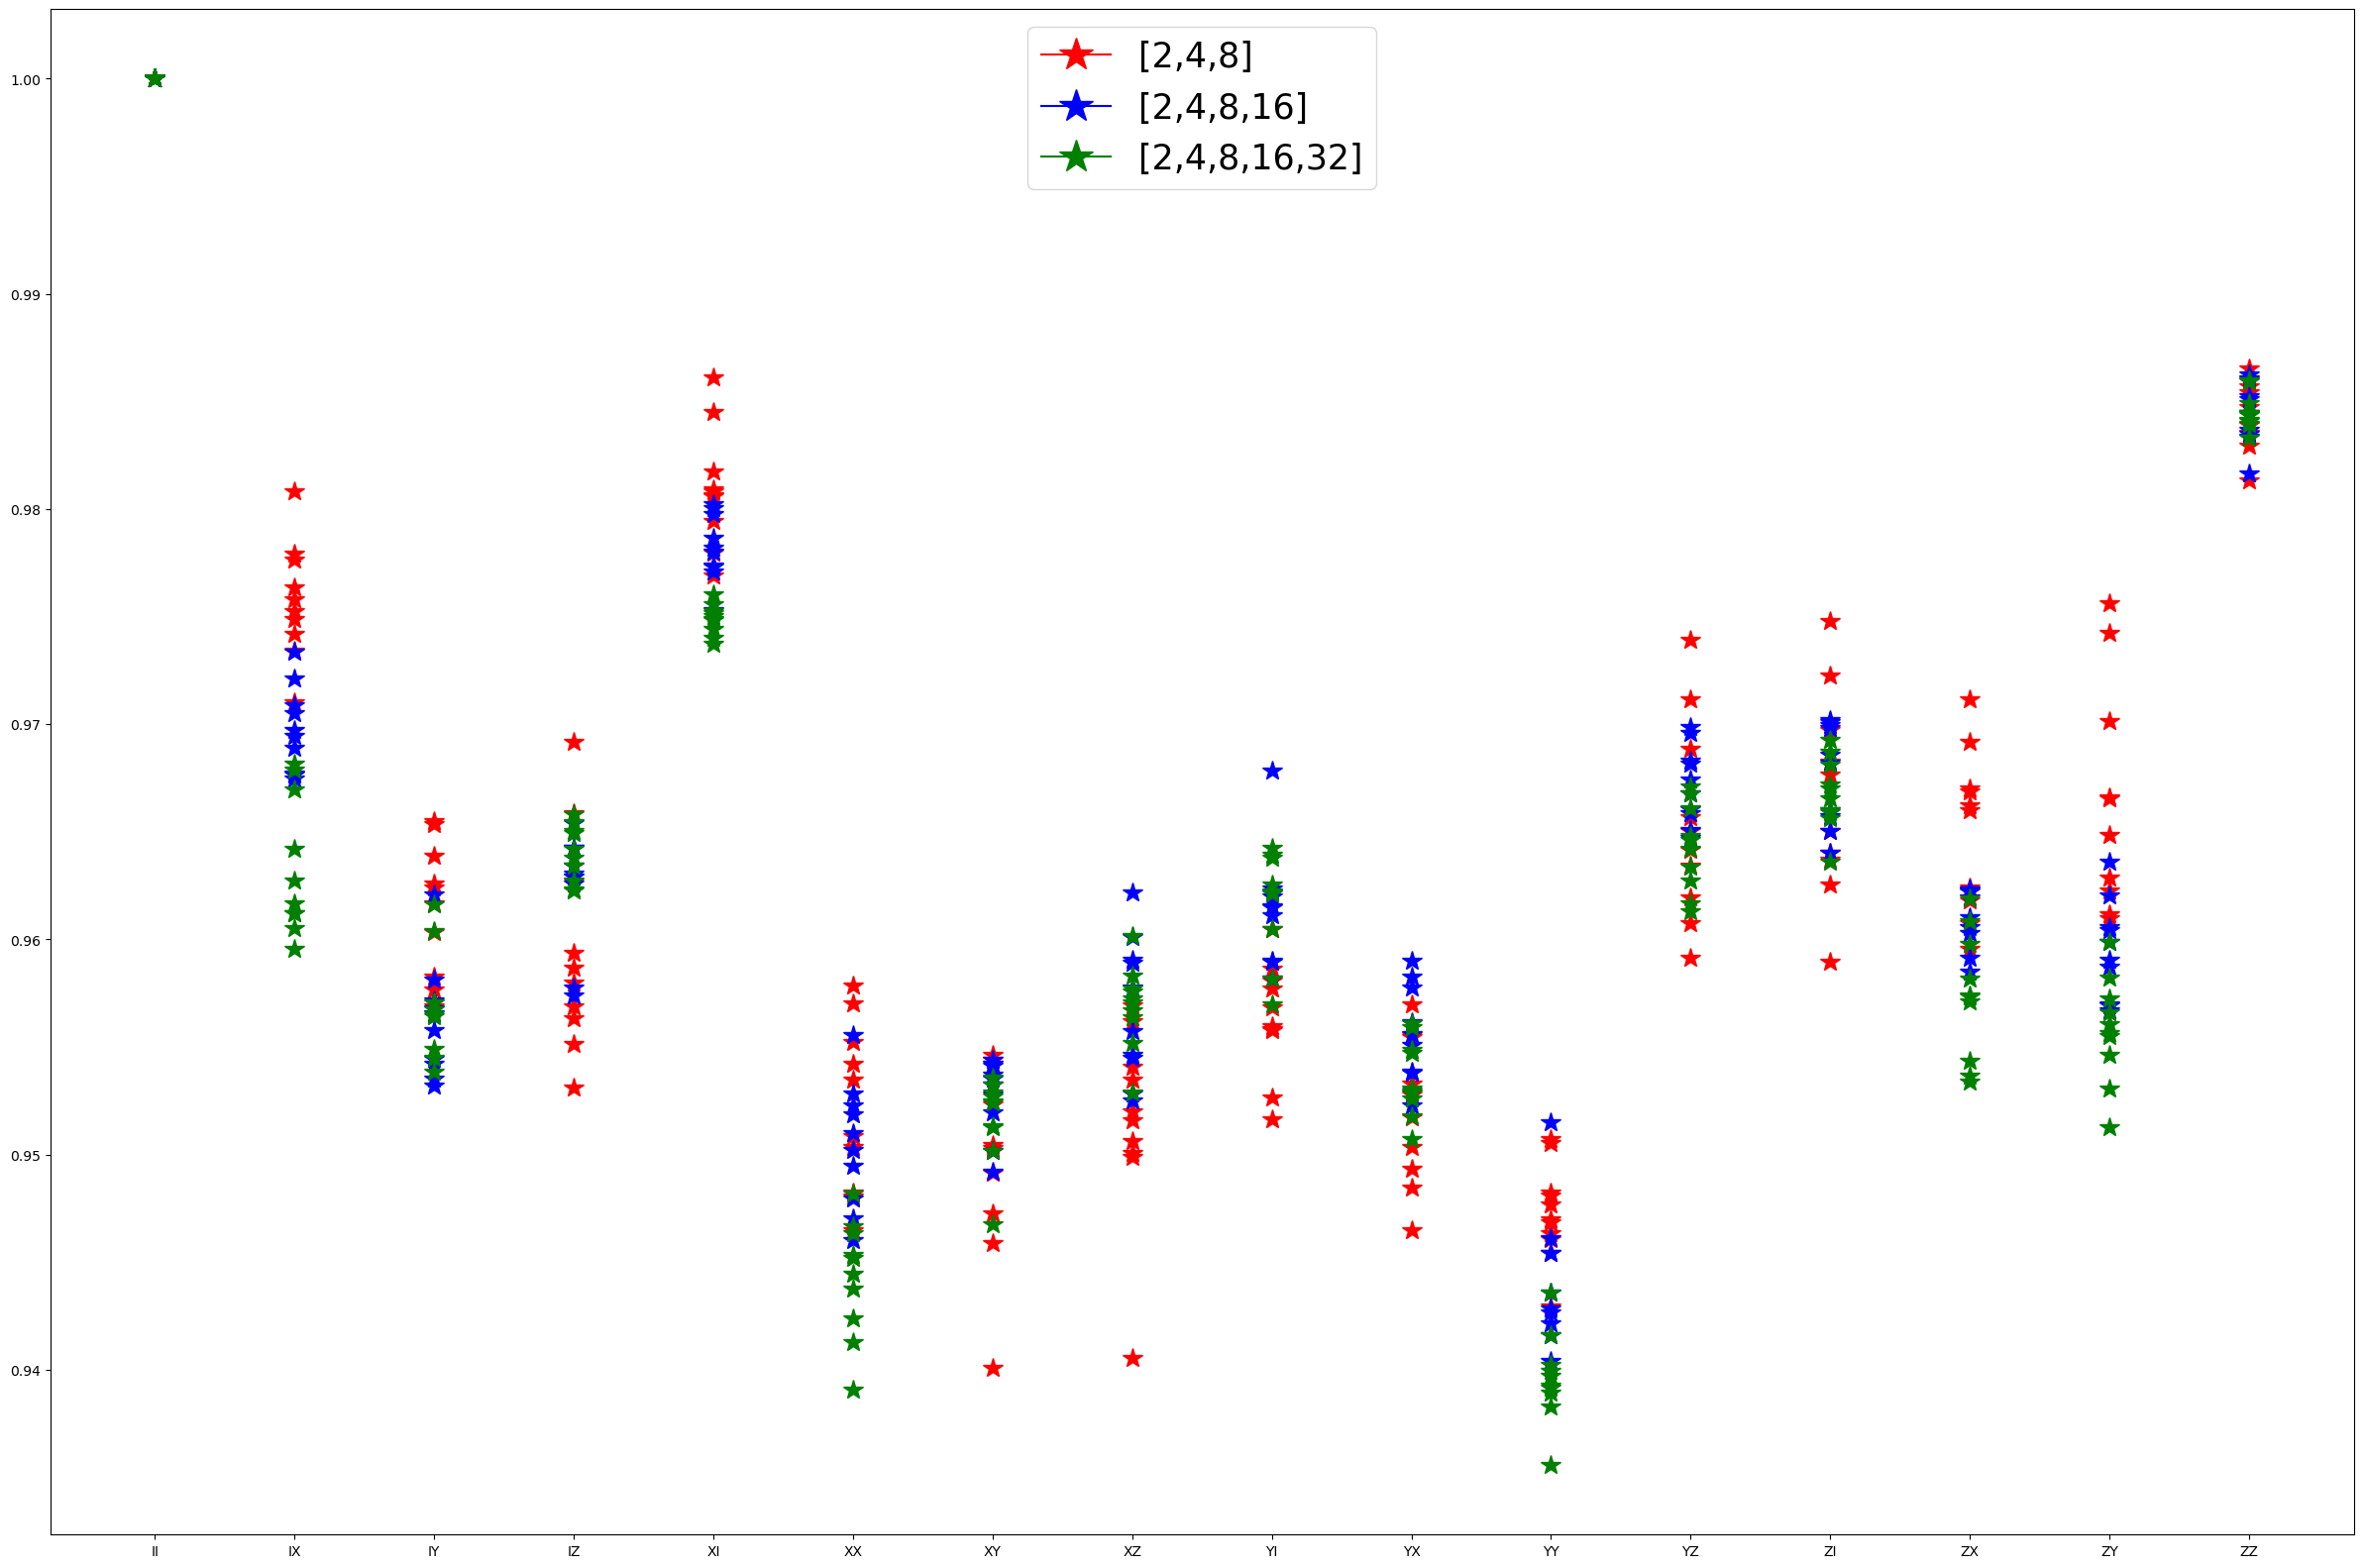

In [22]:
##plot  alpha_detail vs. depth
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d248[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 3')
plt.plot(pauli_request_list,[tuple(alpha_detail_d24816[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 4')
plt.plot(pauli_request_list,[tuple(alpha_detail_d2481632[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 5')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
# plt.legend()
legend_elements = [

                   Line2D([0], [0], marker='*', color="r", label='[2,4,8]',markerfacecolor="r", markersize=25),
                   Line2D([0], [0], marker='*', color="b", label='[2,4,8,16]',markerfacecolor="b", markersize=25),
                   Line2D([0], [0], marker='*', color="g", label='[2,4,8,16,32]',markerfacecolor="g", markersize=25),
                   
                  
                  ]
plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
